# Plotting trained word embeddings to a 2d space

Ref code from: 
- https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
- https://indico.io/blog/visualizing-with-t-sne/
- https://gist.github.com/aneesha/da9216fb8d84245f7af6edaa14f4efa9#file-display_closestwords_tsnescatterplot-ipynb

In [1]:
import gensim 
import numpy as np
import matplotlib.pyplot as plt
# japanese 
import japanize_matplotlib
%matplotlib notebook
from sklearn.manifold import TSNE 
from pathlib import Path 
import os

In [2]:
# load embeddings 
# embedding must be in word2vec format
model = gensim.models.KeyedVectors.load_word2vec_format("results/low_resource/esen/es_50K_en_50K/embed/Bi-LSTM/1016_123321/es_50K.vec")

model2 = gensim.models.KeyedVectors.load_word2vec_format("results/low_resource/esen/es_50K_en_50K/embed/Bi-LSTM/1016_123321/en_50K.vec")


/home/namiakazawa/anaconda3/envs/NLP/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [7]:
%matplotlib notebook
def plot_closest_words_tsne(model, word):
    arr = np.empty((0, 300), dtype="f")
    word_labels = [word]
    
    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()-50, x_coords.max()+50)
    plt.ylim(y_coords.min()-50, y_coords.max()+50)
    plt.show()
    

<IPython.core.display.Javascript object>


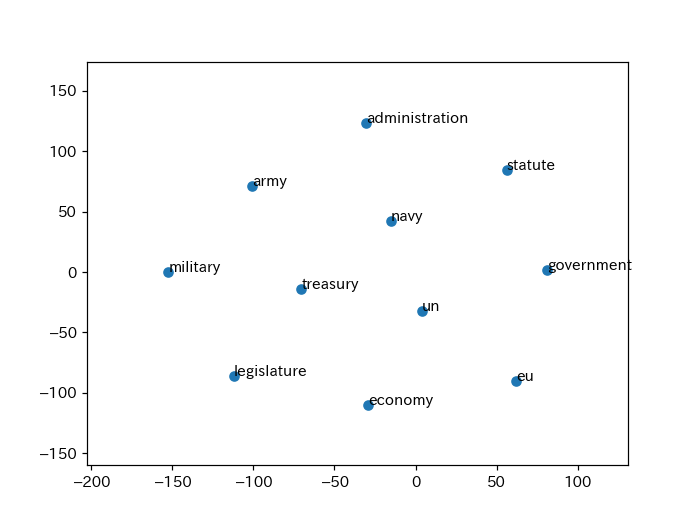

In [33]:
plot_closest_words_tsne(model2, "government")

In [34]:
plot_closest_words_tsne(model, "gobierno")

In [5]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    count = 0
    for word in model.wv.vocab:
        if count == 500:
            break
        tokens.append(model[word])
        labels.append(word)
        count+=1
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/home/namiakazawa/anaconda3/envs/NLP/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


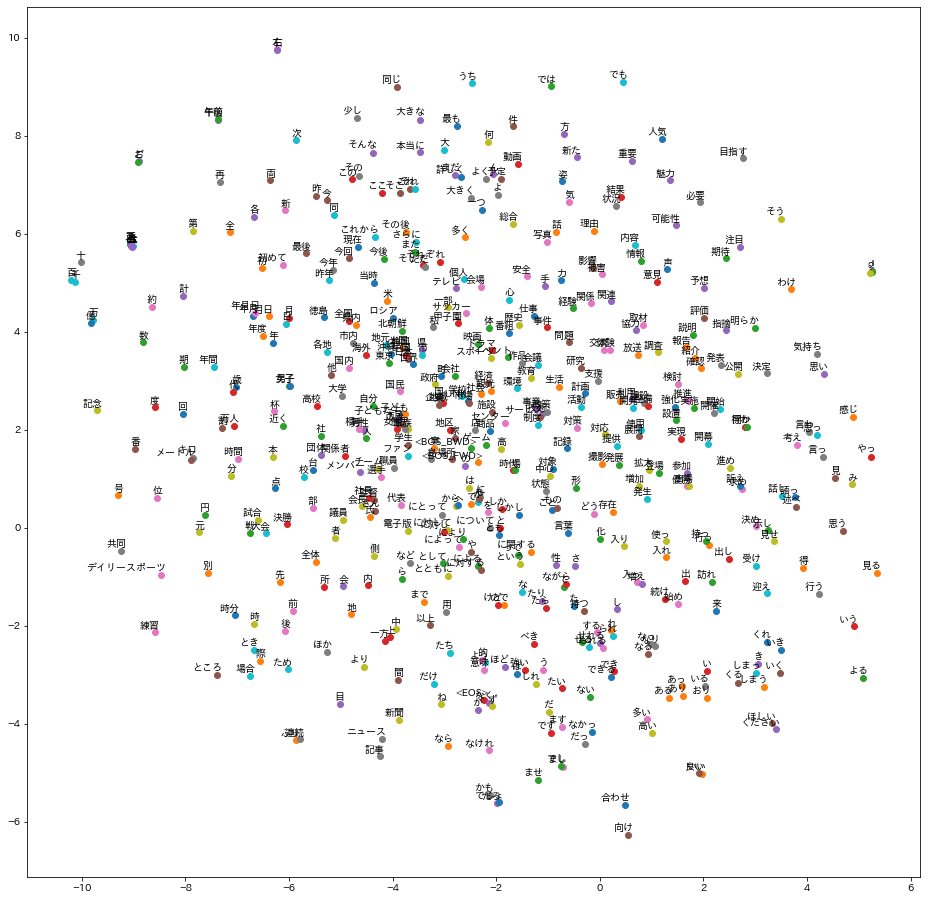

In [6]:
tsne_plot(model)

In [65]:
def tsne_plot(model1, model2):
    
    for model in [model1, model2]:
        "Creates and TSNE model and plots it"
        labels = []
        tokens = []
        count = 0
        for word in model.wv.vocab:
            tokens.append(model[word])
            labels.append(word)
            if count > 200:
                break
            count+=1
            
        tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
        new_values = tsne_model.fit_transform(tokens)

        
        x = []
        y = []
        for value in new_values:
            x.append(value[0])
            y.append(value[1])

        plt.figure(figsize=(16, 16)) 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(labels[i],
                         xy=(x[i], y[i]),
                         xytext=(5, 2),
                         textcoords='offset points',
                         ha='right',
                         va='bottom')
    plt.show()

In [71]:
def tsne_plot(model1, model2):
    labels = []
    final_values = []
    for model in [model1, model2]:
#         "Creates and TSNE model and plots it"
        tokens = []
        count = 0
        for word in model.wv.vocab:
            tokens.append(model[word])
            labels.append(word)
#             if count > 100:
#                 break
            count+=1

        tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
        new_values = tsne_model.fit_transform(tokens)
        final_values.extend(new_values)

        
    x = []
    y = []
    for value in final_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [72]:
tsne_plot(model, model2)

/home/namiakazawa/anaconda3/envs/NLP/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


KeyboardInterrupt: 